In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com//Nareshkharel/prediction-analysis/main/student_habits_performance.csv"
data = pd.read_csv(url)
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [3]:
{'mean': data['exam_score'].mean(), 'median': data['exam_score'].median()}  ## calculate the mean of exam score
data[['exam_score', 'study_hours_per_day', 'sleep_hours']].describe().round(3)

,exam_score,study_hours_per_day,sleep_hours
count,1000.000,1000.000,1000.000
mean,69.602,3.550,6.470
std,16.889,1.469,1.226
min,18.400,0.000,3.200
25%,58.475,2.600,5.600
50%,70.500,3.500,6.500
75%,81.325,4.500,7.300
max,100.000,8.300,10.000


In [4]:
data2 = data.copy()
data2 = data2[data2['gender'] != 'Other']
data2['gender'].value_counts()

gender
Female    481
Male      477
Name: count, dtype: int64

<Axes: xlabel='diet_quality'>

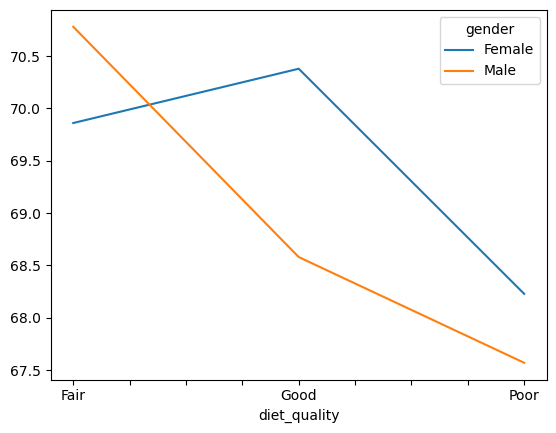

In [5]:
data_pivot = data2.pivot_table(index = 'diet_quality', columns = 'gender', values = 'exam_score')
data_pivot.plot(kind = 'line')

<Axes: xlabel='diet_quality'>

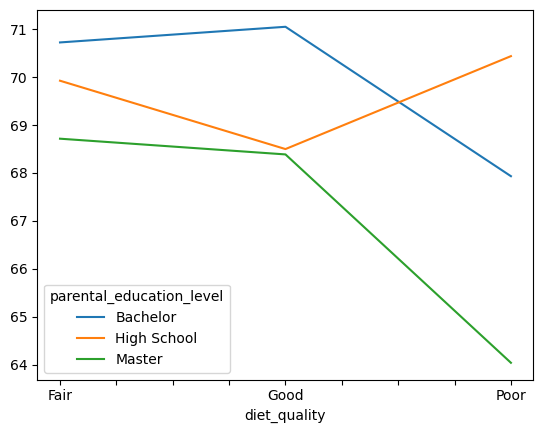

In [6]:
data_pivot2 = data2.pivot_table(index = 'diet_quality', columns = 'parental_education_level', values = 'exam_score')  
data_pivot2.plot()

### Exam score is thus dependent on diet quality and varies by gender
Exploring the difference through other diagrams

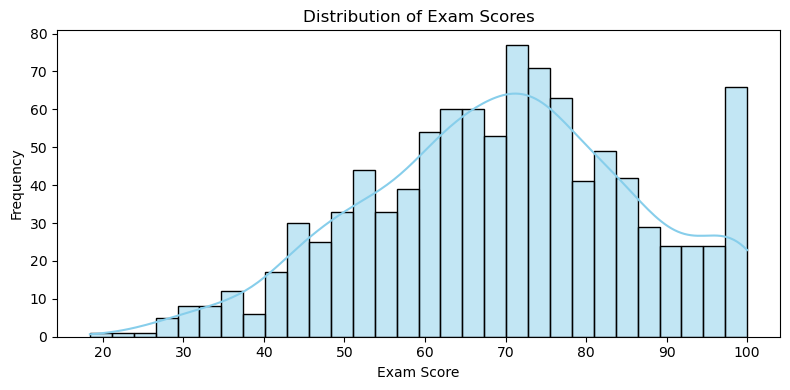

In [7]:
### Checking Distribution of exam score
plt.figure(figsize=(8, 4))
sns.histplot(data['exam_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/var/folders/tc/5zkgp9ms29x86lb6zvf_1krm0000gn/T/ipykernel_9630/177447967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='exam_score', data=data, palette='pastel')


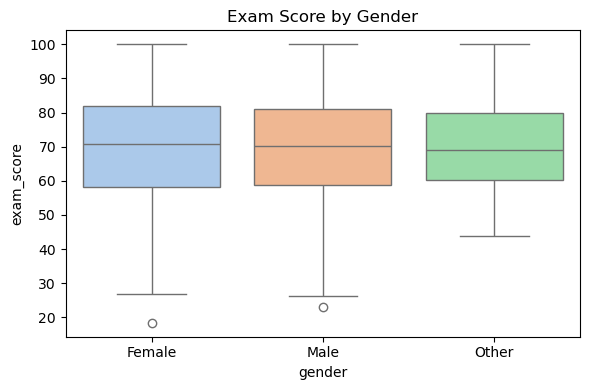

In [8]:
# 6. Boxplot by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='exam_score', data=data, palette='pastel')
plt.title('Exam Score by Gender')
plt.tight_layout()
plt.show()

### Checking for the relation between the study hours and exam score

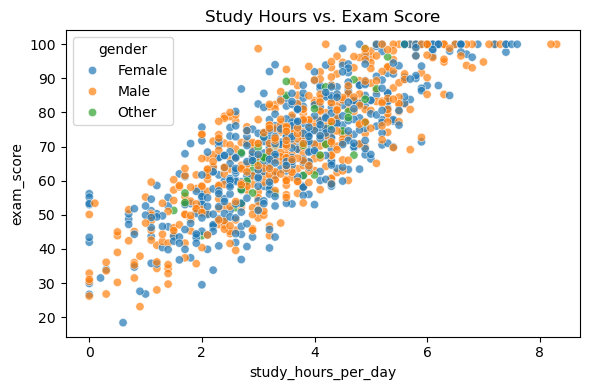

In [9]:
## Scatter Plot: Study Hours vs. Exam Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=data, hue='gender', alpha=0.7)
plt.title('Study Hours vs. Exam Score')
plt.tight_layout()
plt.show()

## There is  a clear correlation between the study hours and exam scores

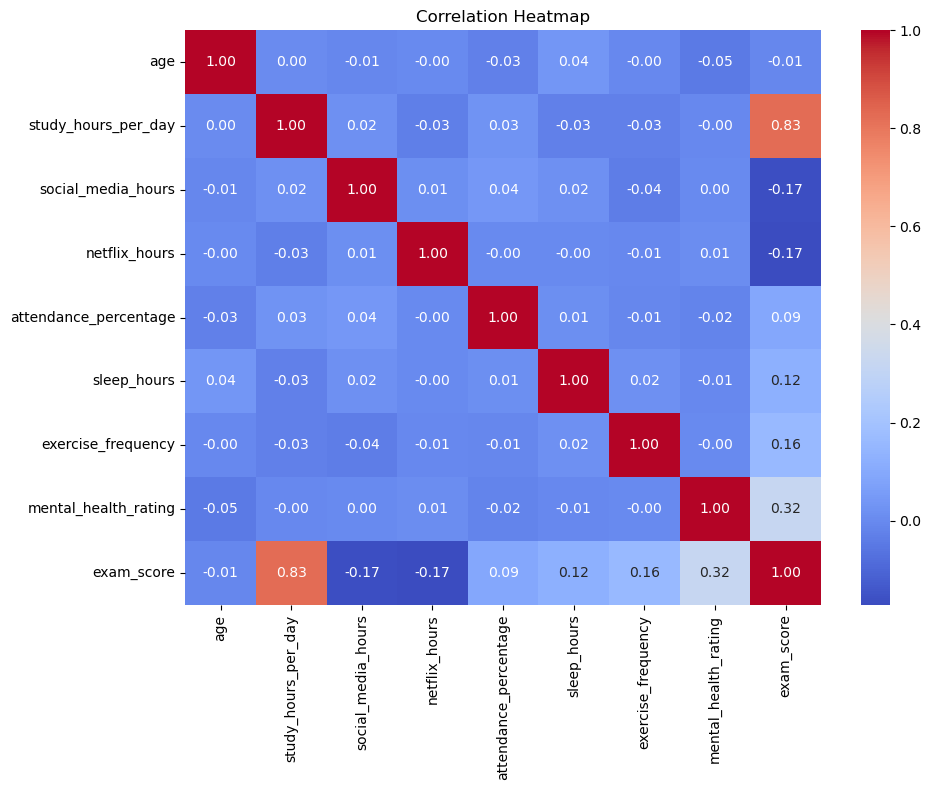

In [10]:
# 8. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Study hours per day has the highest correlation with the exam score. 
## This shows that the student who studies for longer duration gets the highest score

Now we check for the statistical significance and try to predict the exam score using our model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
print(data.describe)

<bound method NDFrame.describe of     student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1           

In [13]:
X = data[['age', 'study_hours_per_day', 'exam_score','social_media_hours','netflix_hours', 'attendance_percentage', 'sleep_hours']]
Y = data['exam_score']
X

,age,study_hours_per_day,exam_score,social_media_hours,netflix_hours,attendance_percentage,sleep_hours
0,23,0.0,56.2,1.2,1.1,85.0,8.0
1,20,6.9,100.0,2.8,2.3,97.3,4.6
2,21,1.4,34.3,3.1,1.3,94.8,8.0
3,23,1.0,26.8,3.9,1.0,71.0,9.2
4,19,5.0,66.4,4.4,0.5,90.9,4.9
...,...,...,...,...,...,...,...
995,21,2.6,76.1,0.5,1.6,77.0,7.5
996,17,2.9,65.9,1.0,2.4,86.0,6.8
997,20,3.0,64.4,2.6,1.3,61.9,6.5
998,24,5.4,69.7,4.1,1.1,100.0,7.6


In [16]:
## splitting the dataset for prediction using linear regression using 20% in testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()

In [32]:
# 13. Fitting Model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
Y_pred = model.predict(X_test)

In [34]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, Y_pred)
print("R-squared:", r2)

Intercept: 0.0
Coefficients: [-1.50381398e-16  1.20164092e-16  1.00000000e+00  1.66473199e-16
  3.41176636e-16  3.67875677e-16 -1.13436214e-16]
Mean Squared Error: 7.068193710780265e-29


TypeError: 'tuple' object is not callable

In [26]:
r2_score = (y_test, y_pred)
r2_score

(521    64.2
 737    72.7
 740    79.0
 660    79.5
 411    58.2
        ... 
 408    34.3
 332    71.2
 208    75.8
 613    85.7
 78     77.3
 Name: exam_score, Length: 200, dtype: float64,
 array([ 64.2,  72.7,  79. ,  79.5,  58.2,  53.4,  70.8,  62.5,  36.8,
         67.6,  53. , 100. ,  58.4,  74.6,  28. ,  55.7,  73.8,  75.5,
         71.8,  59.4,  51.5,  69.3,  36. ,  81.8,  66.3,  71.5,  74. ,
         59.6,  66.7,  59.9,  73.7,  83.5,  70.7,  83.3,  59.8,  42.2,
         71.6,  52.5,  71.4,  97.1,  50.3,  87.9,  70.1,  70.9,  93.8,
         71.4,  57.4,  80.2,  63.8,  62.6,  61.8,  44.3,  65.1,  77.2,
         43.7,  70.6,  71.3,  63.3,  63.7,  50.7,  86.2,  68.1,  72.2,
         47.1,  72.8,  37.4,  76.3,  87.9,  59.7,  77.1,  60.4,  73.9,
         42. ,  51.3,  74.2,  73.5, 100. ,  82.3,  75.4,  75.4,  64.2,
         66.5,  77.8,  62.2,  64.1,  67.1,  69.7,  80.6,  59.2,  23.1,
         96.8,  58.6,  44.1,  48.5,  64.4,  78.4,  96.6,  73.4,  77.6,
         87.8,  63.5,  70.4,

array([ 66.27709933,  75.20524408,  77.76781609,  73.42742923,
        61.07154462,  54.04009168,  75.56430543,  55.09594886,
        40.75272663,  72.40553879,  40.63242138, 102.80177674,
        58.30349975,  71.63717447,  36.06378353,  57.55226686,
        73.49451609,  68.80598764,  65.35613118,  49.95299201,
        55.55037958,  62.4414798 ,  50.7607025 ,  87.64966006,
        70.08295066,  71.67710994,  68.64784116,  56.85223178,
        69.79615335,  67.6728814 ,  65.36587867,  78.63293713,
        63.64428919,  82.05296472,  60.95532323,  50.51730482,
        71.14797488,  58.47143253,  65.03925459,  97.29284417,
        49.99168407,  85.07082619,  67.22977328,  64.51071553,
        94.68791087,  81.63202912,  53.90850633,  79.75637111,
        63.06493849,  65.29081285,  65.86727473,  47.47843039,
        71.04967581,  77.89876818,  45.16195614,  76.05690698,
        73.85320331,  68.70801841,  64.5151572 ,  49.190926  ,
        86.35731007,  75.58496834,  75.6736788 ,  47.14

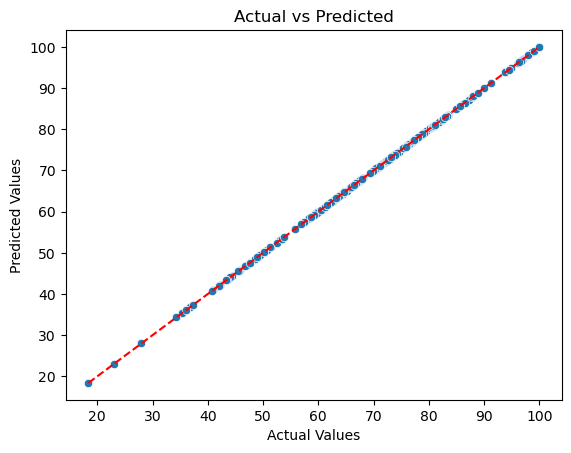

In [27]:
### plotting predicted vs actual values
sns.scatterplot(x=y_test, y=y_pred)

# Draw 45-degree reference line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()